In [175]:
%pylab inline 
import numpy as np
from matplotlib import pylab
np.set_printoptions(precision=3, suppress=1, linewidth=100)

Populating the interactive namespace from numpy and matplotlib


In [176]:
from ReconfigWordProposal import makeReconfigWordMoveCandidate_LP, evaluateReconfigWordMoveCandidate_LP

In [177]:
import bnpy

In [178]:
import BarsK10V900
Data = BarsK10V900.get_data(nDocTotal=300, nWordsPerDoc=200)

In [179]:
LPkwargs = dict(
    nCoordAscentItersLP=50,
    convThrLP=0.001,
    restartLP=1,
    )

In [180]:
trueModel, Info = bnpy.run(Data, 'HDPTopicModel', 'Mult', 'moVB',
                        lam=0.1, alpha=0.5, gamma=10, 
                        nLap=10, nBatch=2, printEvery=25,
                        initname='truelabels',
                       **LPkwargs)

Toy Bars Data with 10 true topics. Each doc uses 1-3 bars.
Entire Dataset Summary:
  total size: 300 units
  batch size: 150 units
  num. batches: 2
Data for Initialization:
  size: 300 units (documents)
  vocab size: 900
  min    5%   50%   95%   max 
  120   125   143   163   182  nUniqueTokensPerDoc
  200   200   200   200   200  nTotalTokensPerDoc
Hist of word_count across tokens 
      1      2      3    <10   <100  >=100
   0.71   0.22   0.06   0.02      0      0
Hist of unique docs per word type
     <1    <10   <100  >=100
      0      0   >.99      0
Allocation Model:  HDP model with K=10 active comps. gamma=10.00. alpha=0.50
Obs. Data  Model:  Multinomial over finite vocabulary.
Obs. Data  Prior:  Dirichlet over finite vocabulary 
  lam = [ 0.1  0.1] ...
Learn Alg: moVB
Trial  1/1 | alg. seed: 4226944 | data order seed: 8541952
savepath: /results/BarsK10V900/defaultjob/1
    0.500/10 after      0 sec. | K   10 | ev -6.168762661e+00 |  
        1/10 after      0 sec. | K   10 

In [181]:
trueLP = trueModel.calc_local_params(Data, **LPkwargs)
trueLP = makeLPWithMinNonzeroValFromLP(Data, trueModel, trueLP)
trueSS = trueModel.get_global_suff_stats(Data, trueLP, doPrecompEntropy=1)

print trueSS.WordCounts[:, :10]

[[ 38.71   32.384  38.274  32.842  36.009  36.894  35.47   31.429  35.389  35.817]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      1.287   0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.      1.234]
 [ 36.858  39.327  44.071  33.843  51.927  40.514   0.      0.      0.      0.   ]
 [  0.      0.      0.      1.096   0.      0.     38.53   34.461  29.325  30.307]
 [  0.      2.289   0.      0.      0.      3.591   0.      2.109   0.      0.   ]
 [  0.      0.      1.655   0.      1.064   0.      0.      0.      0.      3.643]
 [  4.431   0.      0.      1.219   0.      0.      0.      0.      0.      0.   ]]


# Learn model with "dropped words" initialization

In [182]:
hmodel, Info = bnpy.run(Data, 'HDPTopicModel', 'Mult', 'moVB',
                        lam=0.1, alpha=0.5, gamma=10, 
                        nLap=10, nBatch=2, printEvery=25,
                        initname='truelabelsdropwords', initTargetCompID=0, initDropWordIDs='0,1,2,3,4,5',
                       **LPkwargs)

initDropWordIDs:     [0 1 2 3 4 5]
Toy Bars Data with 10 true topics. Each doc uses 1-3 bars.
Entire Dataset Summary:
  total size: 300 units
  batch size: 150 units
  num. batches: 2
Data for Initialization:
  size: 300 units (documents)
  vocab size: 900
  min    5%   50%   95%   max 
  120   125   143   163   182  nUniqueTokensPerDoc
  200   200   200   200   200  nTotalTokensPerDoc
Hist of word_count across tokens 
      1      2      3    <10   <100  >=100
   0.71   0.22   0.06   0.02      0      0
Hist of unique docs per word type
     <1    <10   <100  >=100
      0      0   >.99      0
Allocation Model:  HDP model with K=10 active comps. gamma=10.00. alpha=0.50
Obs. Data  Model:  Multinomial over finite vocabulary.
Obs. Data  Prior:  Dirichlet over finite vocabulary 
  lam = [ 0.1  0.1] ...
Learn Alg: moVB
Trial  1/1 | alg. seed: 4226944 | data order seed: 8541952
savepath: /results/BarsK10V900/defaultjob/1
    0.500/10 after      0 sec. | K   10 | ev -6.174852207e+00 |  
     

In [183]:
LP = hmodel.calc_local_params(Data, **LPkwargs)

curModel = hmodel.copy()
curLP = makeLPWithMinNonzeroValFromLP(Data, curModel, LP)
curSS = curModel.get_global_suff_stats(Data, curLP, doPrecompEntropy=1)
curModel.update_global_params(curSS)

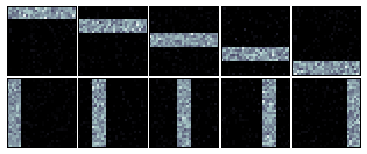

In [184]:
bnpy.viz.PlotComps.plotCompsFromHModel(curModel)

In [185]:
print curSS.WordCounts[:, :10]

[[  0.      0.      0.      0.      0.      0.     35.484  33.603  35.295  35.87 ]
 [  3.32    1.712   2.856   0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      3.877   0.      0.      0.      1.287   0.   ]
 [  0.      4.629   0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      4.954   0.      0.      0.      0.      0.      0.      1.237]
 [ 71.088  66.198  72.71   66.497  85.123  75.912   0.      0.      0.      0.   ]
 [  0.      0.      0.      1.104   0.      0.     38.516  34.397  29.417  30.245]
 [  0.      1.461   0.      0.      0.      5.088   0.      0.      0.      0.   ]
 [  0.      0.      3.48    0.      0.      0.      0.      0.      0.      3.648]
 [  5.591   0.      0.      1.399   0.      0.      0.      0.      0.      0.   ]]


In [186]:
curModel.obsModel.Post.lam[0, targetWordIDs]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [187]:
QMat = Data.getWordTypeCooccurMatrix()

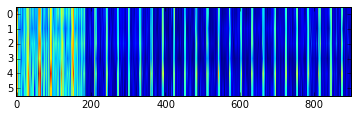

In [188]:
pylab.imshow(QMat[targetWordIDs], aspect=40)

In [189]:
topWords = np.argsort(-1 * QMat[targetWordIDs].sum(axis=0))[:200]

In [190]:
curSS.WordCounts[:, topWords].sum(axis=1)

array([ 3239.922,   814.359,   969.519,   659.278,   950.839,  6276.31 ,   545.364,   627.387,
         390.621,   590.402])

# Create proposal with using "ground truth labels"

In [191]:
targetWordIDs = [0,1,2,3,4,5]

In [192]:
propLP_fromtruelabels = makeReconfigWordMoveCandidate_LP(
    Data, curLP, curModel, 
    strategyName='truelabels', targetWordIDs=targetWordIDs, targetCompID=5, destCompIDs=[0])

before norm:
1


In [193]:
assert np.allclose(propLP_fromtruelabels['resp'].sum(), curLP['resp'].sum())

In [194]:
propSS = curModel.get_global_suff_stats(Data, propLP_fromtruelabels)

In [195]:
propSS.WordCounts[[0,5,10,11], :10]

array([[  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  35.484,  33.603,  35.295,  35.87 ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [ 62.435,  58.093,  62.826,  56.151,  74.502,  66.614,   0.   ,   0.   ,   0.   ,   0.   ],
       [  8.653,   8.105,   9.884,  10.347,  10.621,   9.298,   0.   ,   0.   ,   0.   ,   0.   ]])

In [196]:
curSS.WordCounts[[0,5], :10]

array([[  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  35.484,  33.603,  35.295,  35.87 ],
       [ 71.088,  66.198,  72.71 ,  66.497,  85.123,  75.912,   0.   ,   0.   ,   0.   ,   0.   ]])

In [197]:
trueSS.WordCounts[[0,5], :10]

array([[ 38.71 ,  32.384,  38.274,  32.842,  36.009,  36.894,  35.47 ,  31.429,  35.389,  35.817],
       [ 36.858,  39.327,  44.071,  33.843,  51.927,  40.514,   0.   ,   0.   ,   0.   ,   0.   ]])

In [198]:
propModel_fromtrue, Result = evaluateReconfigWordMoveCandidate_LP(
    Data, curModel, 
    curLP=curLP, propLP=propLP_fromtruelabels,
    targetWordIDs=targetWordIDs, targetCompID=5, destCompIDs=[0])

 current ELBO: -6.05185
Candidate merge pairs: 
[(5, 10), (0, 11)]
expanded ELBO: -6.06096
Accepted merge pairs: 
[(5, 10), (0, 11)]
   final ELBO: -6.05133
